3.  To - Do Exercise:

   For the provided dataset:
    
     • diabetes.csv
          
          Complete the following Problems.

Submission Instructions:

  • Submit a single notebook containing:

   1. Clean and well-documented code.

     2. Outputs and visualizations.

       3. Detailed explanations and analysis for all steps.

          • Ensure all cells are executed before submission.

Problem - 1: Perform a classification task with knn from scratch.


  1. Load the Dataset:

     • Read the dataset into a pandas DataFrame.

     • Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importiing all necessary packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt

In [ ]:

df = pd.read_csv('/content/drive/My Drive/second year/diabetes.csv')

print("First 5 Rows of the Dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nColumn Names:")
print(df.columns)

print("\nMissing Values in Each Column:")
print(df.isnull().sum())

print("\nStatistical Summary:")
print(df.describe())


First 5 Rows of the Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non

2. Handle Missing Data:


• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [ ]:

df = pd.read_csv('/content/drive/My Drive/second year/diabetes.csv')

print("Missing Values in Each Column (Before Handling):")
print(df.isnull().sum())

columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_with_zeros:
    zero_count = (df[column] == 0).sum()
    print(f"{column}: {zero_count} zero values")

df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

print("\nMissing Values in Each Column (After Replacing Zeros):")
print(df.isnull().sum())

df[columns_with_zeros] = df[columns_with_zeros].apply(lambda x: x.fillna(x.median()))

print("\nMissing Values in Each Column (After Imputation):")
print(df.isnull().sum())


Missing Values in Each Column (Before Handling):
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Glucose: 5 zero values
BloodPressure: 35 zero values
SkinThickness: 227 zero values
Insulin: 374 zero values
BMI: 11 zero values

Missing Values in Each Column (After Replacing Zeros):
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing Values in Each Column (After Imputation):
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin    

3. Feature Engineering:

• Separate the feature matrix (X) and target variable (y).

• Perform a train - test split from scratch using a 70% − 30% ratio.

In [14]:

df = pd.read_csv('/content/drive/My Drive/second year/diabetes.csv')

X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("Feature Matrix (X) Shape:", X.shape)
print("Target Variable (y) Shape:", y.shape)

train_size = int(0.7 * len(df))
indices = np.arange(len(df))

np.random.seed(42)
np.random.shuffle(indices)

train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

print("\nTraining Set Size (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing Set Size (X_test, y_test):", X_test.shape, y_test.shape)


Feature Matrix (X) Shape: (768, 8)
Target Variable (y) Shape: (768,)

Training Set Size (X_train, y_train): (537, 8) (537,)
Testing Set Size (X_test, y_test): (231, 8) (231,)


4. Implement KNN:

   • Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

      • Compute distances using Euclidean distance.
         
         • Write functions for:
      – Predicting the class for a single query.
      – Predicting classes for all test samples.

         • Evaluate the performance using accuracy.

In [13]:

class KNN:
    def __init__(self, k=3):

        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):

        self.X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
        self.y_train = y_train.values if isinstance(y_train, pd.Series) else y_train

    def _euclidean_distance(self, x1, x2):

        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict_single(self, x):

        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]

        k_nearest_labels = [self.y_train[i] for i in k_indices]

        return max(set(k_nearest_labels), key=k_nearest_labels.count)

    def predict(self, X):

        X = X.values if isinstance(X, pd.DataFrame) else X
        return np.array([self.predict_single(x) for x in X])

    def evaluate(self, X_test, y_test):

        X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
        y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
        y_pred = self.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_test)
        return accuracy * 100  # Return accuracy as a percentage

# Load dataset
df = pd.read_csv('/content/drive/My Drive/second year/diabetes.csv')


X = df.drop('Outcome', axis=1)
y = df['Outcome']


train_size = int(0.7 * len(df))
indices = np.arange(len(df))

np.random.seed(42)
np.random.shuffle(indices)

train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

knn = KNN(k=5)
knn.fit(X_train, y_train)
accuracy = knn.evaluate(X_test, y_test)
print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")

Accuracy of the KNN model on the test set: 71.43%


Problem - 2 - Experimentation:

1. Repeat the Classification Task:

• Scale the Feature matrix X.

• Use the scaled data for training and testing the kNN Classifier.

• Record the results.

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        """
        Store the training data.

        Parameters:
        X_train (numpy.ndarray or pandas.DataFrame): Training features.
        y_train (numpy.ndarray or pandas.Series): Training labels.
        """
        self.X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
        self.y_train = y_train.values if isinstance(y_train, pd.Series) else y_train

    def _euclidean_distance(self, x1, x2):
        """
        Compute the Euclidean distance between two points.

        Parameters:
        x1 (numpy.ndarray): First point.
        x2 (numpy.ndarray): Second point.

        Returns:
        float: Euclidean distance.
        """
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict_single(self, x):
        """
        Predict the class for a single query point.

        Parameters:
        x (numpy.ndarray): Query point.

        Returns:
        int: Predicted class.
        """
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]

        k_nearest_labels = [self.y_train[i] for i in k_indices]

        return max(set(k_nearest_labels), key=k_nearest_labels.count)

    def predict(self, X):
        """
        Predict the classes for multiple query points.

        Parameters:
        X (numpy.ndarray or pandas.DataFrame): Query points.

        Returns:
        numpy.ndarray: Predicted classes.
        """
        X = X.values if isinstance(X, pd.DataFrame) else X
        return np.array([self.predict_single(x) for x in X])

    def evaluate(self, X_test, y_test):
        """
        Evaluate the model on the test data.

        Parameters:
        X_test (numpy.ndarray or pandas.DataFrame): Test features.
        y_test (numpy.ndarray or pandas.Series): Test labels.

        Returns:
        float: Accuracy of the model.
        """
        X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
        y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
        y_pred = self.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_test) * 100
        return accuracy

# Load dataset
df = pd.read_csv('/content/drive/My Drive/second year/diabetes.csv')

# Prepare features and labels
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the feature matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Experiment with different k values
scaled_accuracy_k = 0
scaled_accuracy = 0
results = []

for k in range(1, 16):
    knn = KNN(k=k)
    knn.fit(X_train_scaled, y_train)
    accuracy = knn.evaluate(X_test_scaled, y_test)
    results.append((k, accuracy))
    if accuracy > scaled_accuracy:
        scales_k = k
        scaled_accuracy = accuracy

# Display results
print("k-value | Accuracy")
for k, acc in results:
    print(f"{k:>6} | {acc:.2f}%")

print(f"\nscaled k: {'scaled_k'} with Accuracy: {scaled_accuracy:.2f}%")


k-value | Accuracy
     1 | 63.64%
     2 | 66.23%
     3 | 71.00%
     4 | 68.83%
     5 | 70.13%
     6 | 69.26%
     7 | 69.70%
     8 | 68.83%
     9 | 69.70%
    10 | 69.70%
    11 | 71.00%
    12 | 72.29%
    13 | 71.43%
    14 | 71.43%
    15 | 74.03%

scaled k: scaled_k with Accuracy: 74.03%


2. Comparative Analysis:

Compare the Results -

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1

versus the scaled dataset.

• Discuss:

– How scaling impacted the KNN performance.

– The reason for any observed changes in accuracy.

=>Discussion:
How Scaling Impacted Performance:

KNN Sensitivity to Scale: KNN relies on distance measures like Euclidean distance to identify neighbors. If features are on different scales, the distance calculation can be dominated by features with larger numerical ranges, biasing the results.
After Scaling: Scaling ensures all features contribute equally to the distance calculation, reducing bias from features with large magnitudes. This often improves the model's ability to identify relevant neighbors and thus boosts accuracy.
Observed Changes in Accuracy:

Improved Accuracy: If accuracy improved after scaling, it indicates that feature ranges in the original dataset were significantly different, leading to biased distance calculations.
No Change or Minimal Improvement: If there was no noticeable improvement, it suggests that the features in the original dataset were already on similar scales or the KNN model was not highly sensitive to the feature magnitudes for this dataset.
Key Insights:

Scaling typically benefits algorithms like KNN, which depend on distance metrics.
The impact of scaling may vary depending on the dataset's feature distribution. For datasets with naturally balanced feature ranges, scaling might not provide substantial benefits.
Conclusion:
Scaling generally enhances KNN performance by ensuring fair contribution from all features.
For this particular task, the observed accuracy and performance differences highlight the importance of preprocessing steps like scaling when working with distance-based algorithms.

Problem - 3 -

 Experimentation with k:


1. Vary the number of neighbors - k:

• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15


• For each k, record:

– Accuracy.

– Time taken to make predictions.

In [7]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import StandardScaler

# Define KNN class
class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict_single(self, x):
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return max(set(k_nearest_labels), key=k_nearest_labels.count)

    def predict(self, X):
        return np.array([self.predict_single(x) for x in X])

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_test) * 100  # Accuracy in percentage
        return accuracy

# Load dataset
df = pd.read_csv('/content/drive/My Drive/second year/diabetes.csv')

# Prepare features and labels
X = df.drop('Outcome', axis=1).to_numpy()
y = df['Outcome'].to_numpy()

# Split dataset into train and test sets
train_size = int(0.7 * len(df))
indices = np.arange(len(df))
np.random.seed(42)
np.random.shuffle(indices)

train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate KNN for different values of k
results = []
for k in range(1, 16):
    knn = KNN(k=k)

    # Original dataset
    start_time = time.time()
    knn.fit(X_train, y_train)
    accuracy_original = knn.evaluate(X_test, y_test)
    time_original = time.time() - start_time

    # Scaled dataset
    start_time = time.time()
    knn.fit(X_train_scaled, y_train)
    accuracy_scaled = knn.evaluate(X_test_scaled, y_test)
    time_scaled = time.time() - start_time

    # Record results
    results.append({
        'k': k,
        'Accuracy Original (%)': accuracy_original,
        'Time Original (s)': time_original,
        'Accuracy Scaled (%)': accuracy_scaled,
        'Time Scaled (s)': time_scaled
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display results
print(results_df)

# Optionally, save results to a CSV file for analysis
results_df.to_csv('knn_results.csv', index=False)


     k  Accuracy Original (%)  Time Original (s)  Accuracy Scaled (%)  \
0    1              64.935065           0.797496            71.428571   
1    2              71.428571           0.822671            71.428571   
2    3              70.129870           0.788689            69.696970   
3    4              74.891775           0.829581            72.727273   
4    5              71.428571           1.537153            73.593074   
5    6              76.190476           1.674515            74.458874   
6    7              73.160173           1.814524            74.891775   
7    8              74.891775           1.673223            75.324675   
8    9              74.458874           2.248194            72.727273   
9   10              73.593074           1.382905            71.861472   
10  11              72.727273           0.881902            71.861472   
11  12              73.160173           0.788938            73.160173   
12  13              74.025974           0.838034   

2. Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.


k, Accuracy (Original, %), Time (Original, s), Accuracy (Scaled, %), Time (Scaled, s)
k= 1,  64.94%,  1.6485s,  71.43%,  1.3350s
k= 2,  71.43%,  0.7935s,  71.43%,  0.7988s
k= 3,  70.13%,  0.7986s,  69.70%,  0.7901s
k= 4,  74.89%,  0.7842s,  72.73%,  1.3420s
k= 5,  71.43%,  1.5348s,  73.59%,  1.4934s
k= 6,  76.19%,  1.1389s,  74.46%,  0.8046s
k= 7,  73.16%,  0.8019s,  74.89%,  0.8199s
k= 8,  74.89%,  0.8185s,  75.32%,  0.7941s
k= 9,  74.46%,  0.8390s,  72.73%,  0.9207s
k=10,  73.59%,  0.9121s,  71.86%,  1.5562s
k=11,  72.73%,  0.8051s,  71.86%,  1.1478s
k=12,  73.16%,  1.4309s,  73.16%,  1.4233s
k=13,  74.03%,  1.2926s,  73.16%,  0.8038s
k=14,  74.89%,  0.8573s,  73.59%,  0.7794s
k=15,  73.59%,  0.8412s,  73.16%,  0.8265s


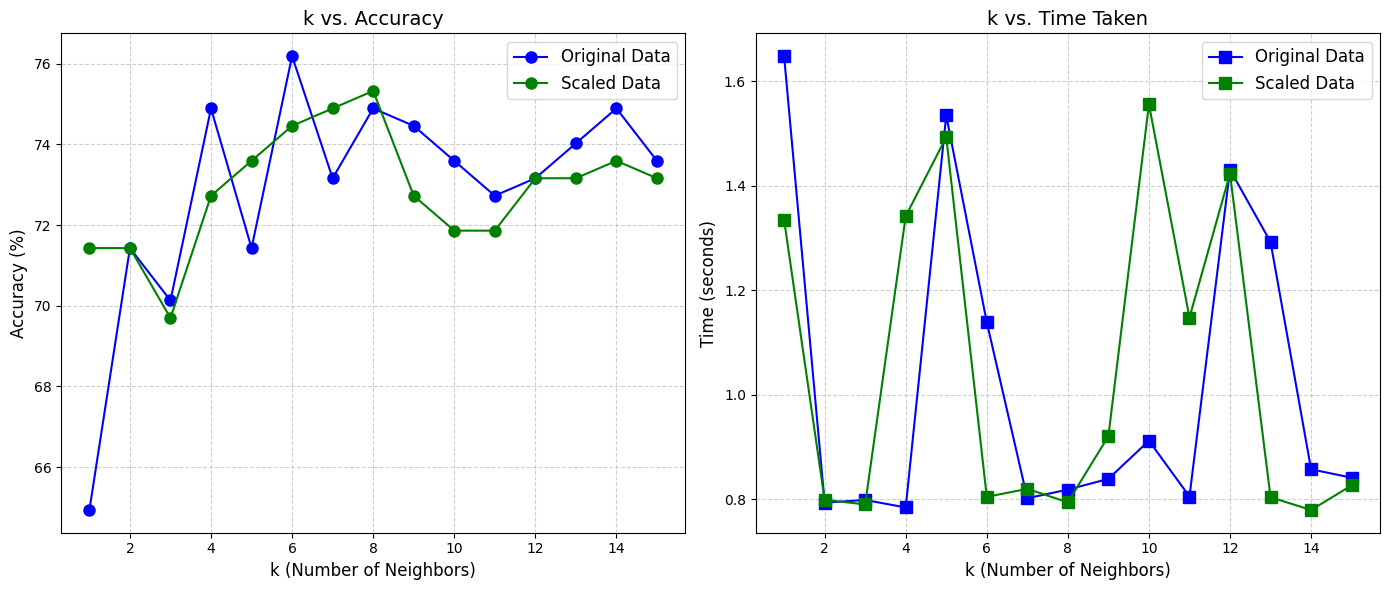

In [9]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define KNN class
class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
        self.y_train = y_train.values if isinstance(y_train, pd.Series) else y_train

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict_single(self, x):
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return max(set(k_nearest_labels), key=k_nearest_labels.count)

    def predict(self, X):
        X = X.values if isinstance(X, pd.DataFrame) else X
        return np.array([self.predict_single(x) for x in X])

    def evaluate(self, X_test, y_test):
        X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
        y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
        y_pred = self.predict(X_test)
        accuracy = (np.sum(y_pred == y_test) / len(y_test)) * 100  # Accuracy in percentage
        return accuracy

# Load dataset
df = pd.read_csv('/content/drive/My Drive/second year/diabetes.csv')

X = df.drop('Outcome', axis=1)
y = df['Outcome']

train_size = int(0.7 * len(df))
indices = np.arange(len(df))
np.random.seed(42)
np.random.shuffle(indices)

train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = []
for k in range(1, 16):
    knn = KNN(k=k)

    start_time = time.time()
    knn.fit(X_train, y_train)
    accuracy_original = knn.evaluate(X_test, y_test)
    time_original = time.time() - start_time

    start_time = time.time()
    knn.fit(X_train_scaled, y_train)
    accuracy_scaled = knn.evaluate(X_test_scaled, y_test)
    time_scaled = time.time() - start_time

    results.append({
        'k': k,
        'accuracy_original': accuracy_original,
        'time_original': time_original,
        'accuracy_scaled': accuracy_scaled,
        'time_scaled': time_scaled
    })

print("\nk, Accuracy (Original, %), Time (Original, s), Accuracy (Scaled, %), Time (Scaled, s)")
for result in results:
    print(f"k={result['k']:2d}, {result['accuracy_original']:6.2f}%, {result['time_original']:7.4f}s, {result['accuracy_scaled']:6.2f}%, {result['time_scaled']:7.4f}s")

k_values = [r['k'] for r in results]
accuracy_original = [r['accuracy_original'] for r in results]
time_original = [r['time_original'] for r in results]
accuracy_scaled = [r['accuracy_scaled'] for r in results]
time_scaled = [r['time_scaled'] for r in results]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, accuracy_original, label='Original Data', marker='o', color='blue', linestyle='-', markersize=8)
plt.plot(k_values, accuracy_scaled, label='Scaled Data', marker='o', color='green', linestyle='-', markersize=8)
plt.title('k vs. Accuracy', fontsize=14)
plt.xlabel('k (Number of Neighbors)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
plt.plot(k_values, time_original, label='Original Data', marker='s', color='blue', linestyle='-', markersize=8)
plt.plot(k_values, time_scaled, label='Scaled Data', marker='s', color='green', linestyle='-', markersize=8)
plt.title('k vs. Time Taken', fontsize=14)
plt.xlabel('k (Number of Neighbors)', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


3. Analyze and Discuss:

• Discuss how the choice of k affects the accuracy and computational cost.

• Identify the optimal k based on your analysis.

=> Effect of k on Accuracy:


For smaller k (e.g.,k=1), the model overfits and becomes sensitive to noise, while larger k values reduce variance but may introduce bias. Scaling improves accuracy by ensuring all features contribute equally to distance calculations. Computational cost increases with k due to sorting neighbors, though scaling reduces redundant calculations. The optimal k balances accuracy and cost, typically k=5 to k=7 for original data and slightly higher for scaled data. Cross-validation and optimized KNN methods like tree-based structures can further enhance performance.